In [ ]:
import pandas as pd

In [ ]:
!pip install openpyxl

In [ ]:
import openpyxl


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bankruptcy-prevention.xlsx to bankruptcy-prevention (1).xlsx


In [ ]:
data=pd.read_excel("bankruptcy-prevention.xlsx")

In [ ]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
data.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,is_outlier
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,1.036000,1.22800,0.752000,0.940000,0.952000,1.14000,0.572000,0.960000
std,0.823051,0.82141,0.803166,0.831363,0.881364,0.86915,0.495781,0.280562
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000
25%,0.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
75%,2.000000,2.00000,1.000000,2.000000,2.000000,2.00000,1.000000,1.000000
max,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,1.000000,1.000000


In [ ]:
import pandas as pd

for column in data.columns:
    unique_categories = data[column].unique()
    print(f"Unique categories in {column}:", unique_categories)


Unique categories in industrial_risk: [0.5 0.  1. ]
Unique categories in management_risk: [1.  0.  0.5]
Unique categories in financial_flexibility: [0.  0.5 1. ]
Unique categories in credibility: [0.  0.5 1. ]
Unique categories in competitiveness: [0.  0.5 1. ]
Unique categories in operating_risk: [0.5 1.  0. ]
Unique categories in class: ['bankruptcy' 'non-bankruptcy']


In [ ]:
categorical_columns = ['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']

In [ ]:
data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

In [ ]:
for column in categorical_columns:
  data[column] = label_encoder.fit_transform(data[column])

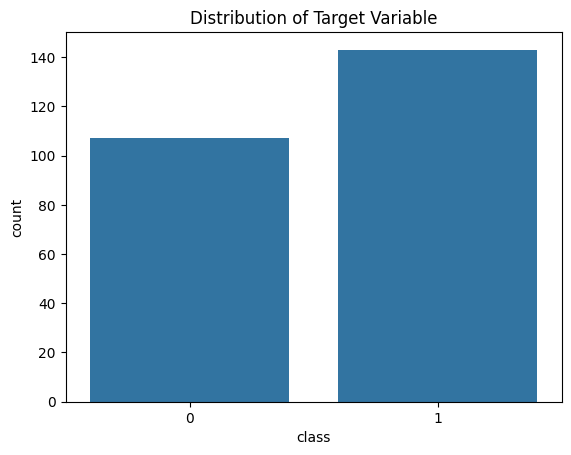

In [ ]:
#Target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=data)
plt.title('Distribution of Target Variable')
plt.show()


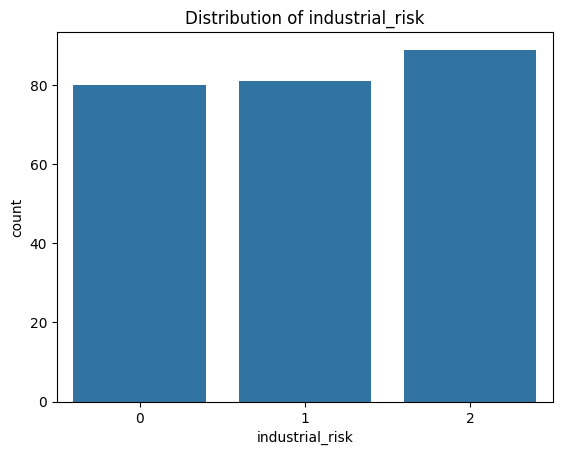

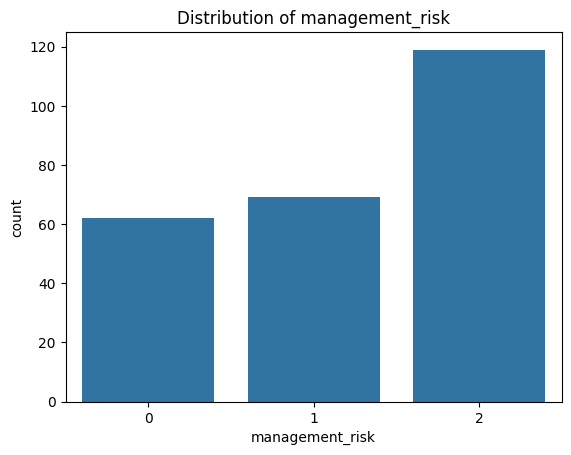

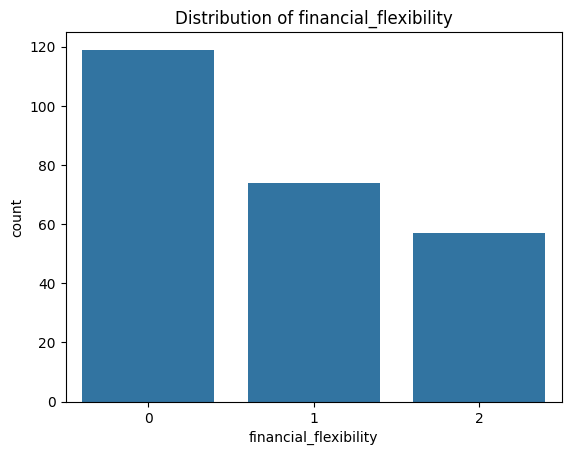

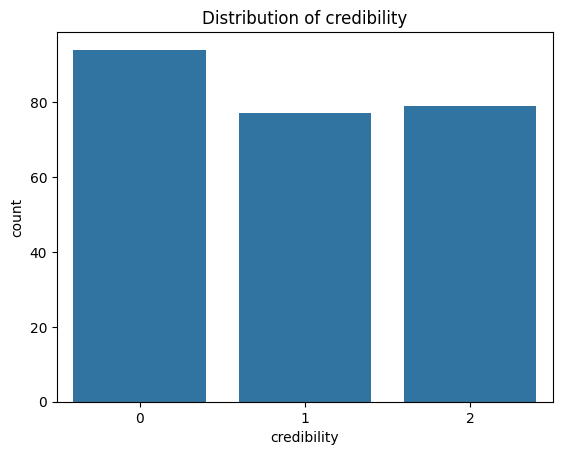

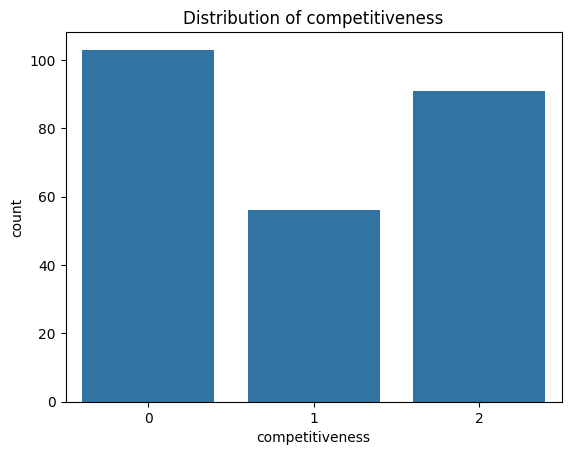

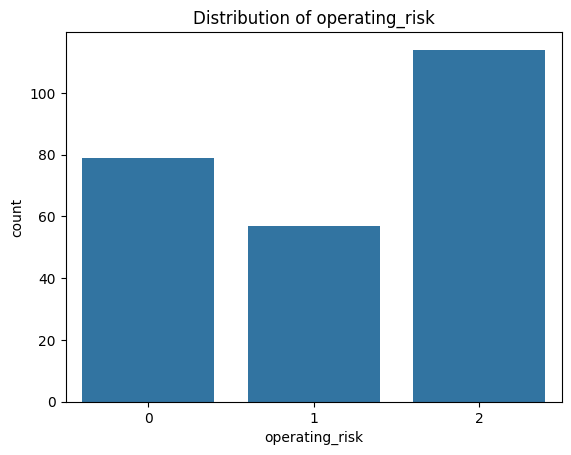

In [ ]:
#feature distribution
for column in categorical_columns:
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.show()

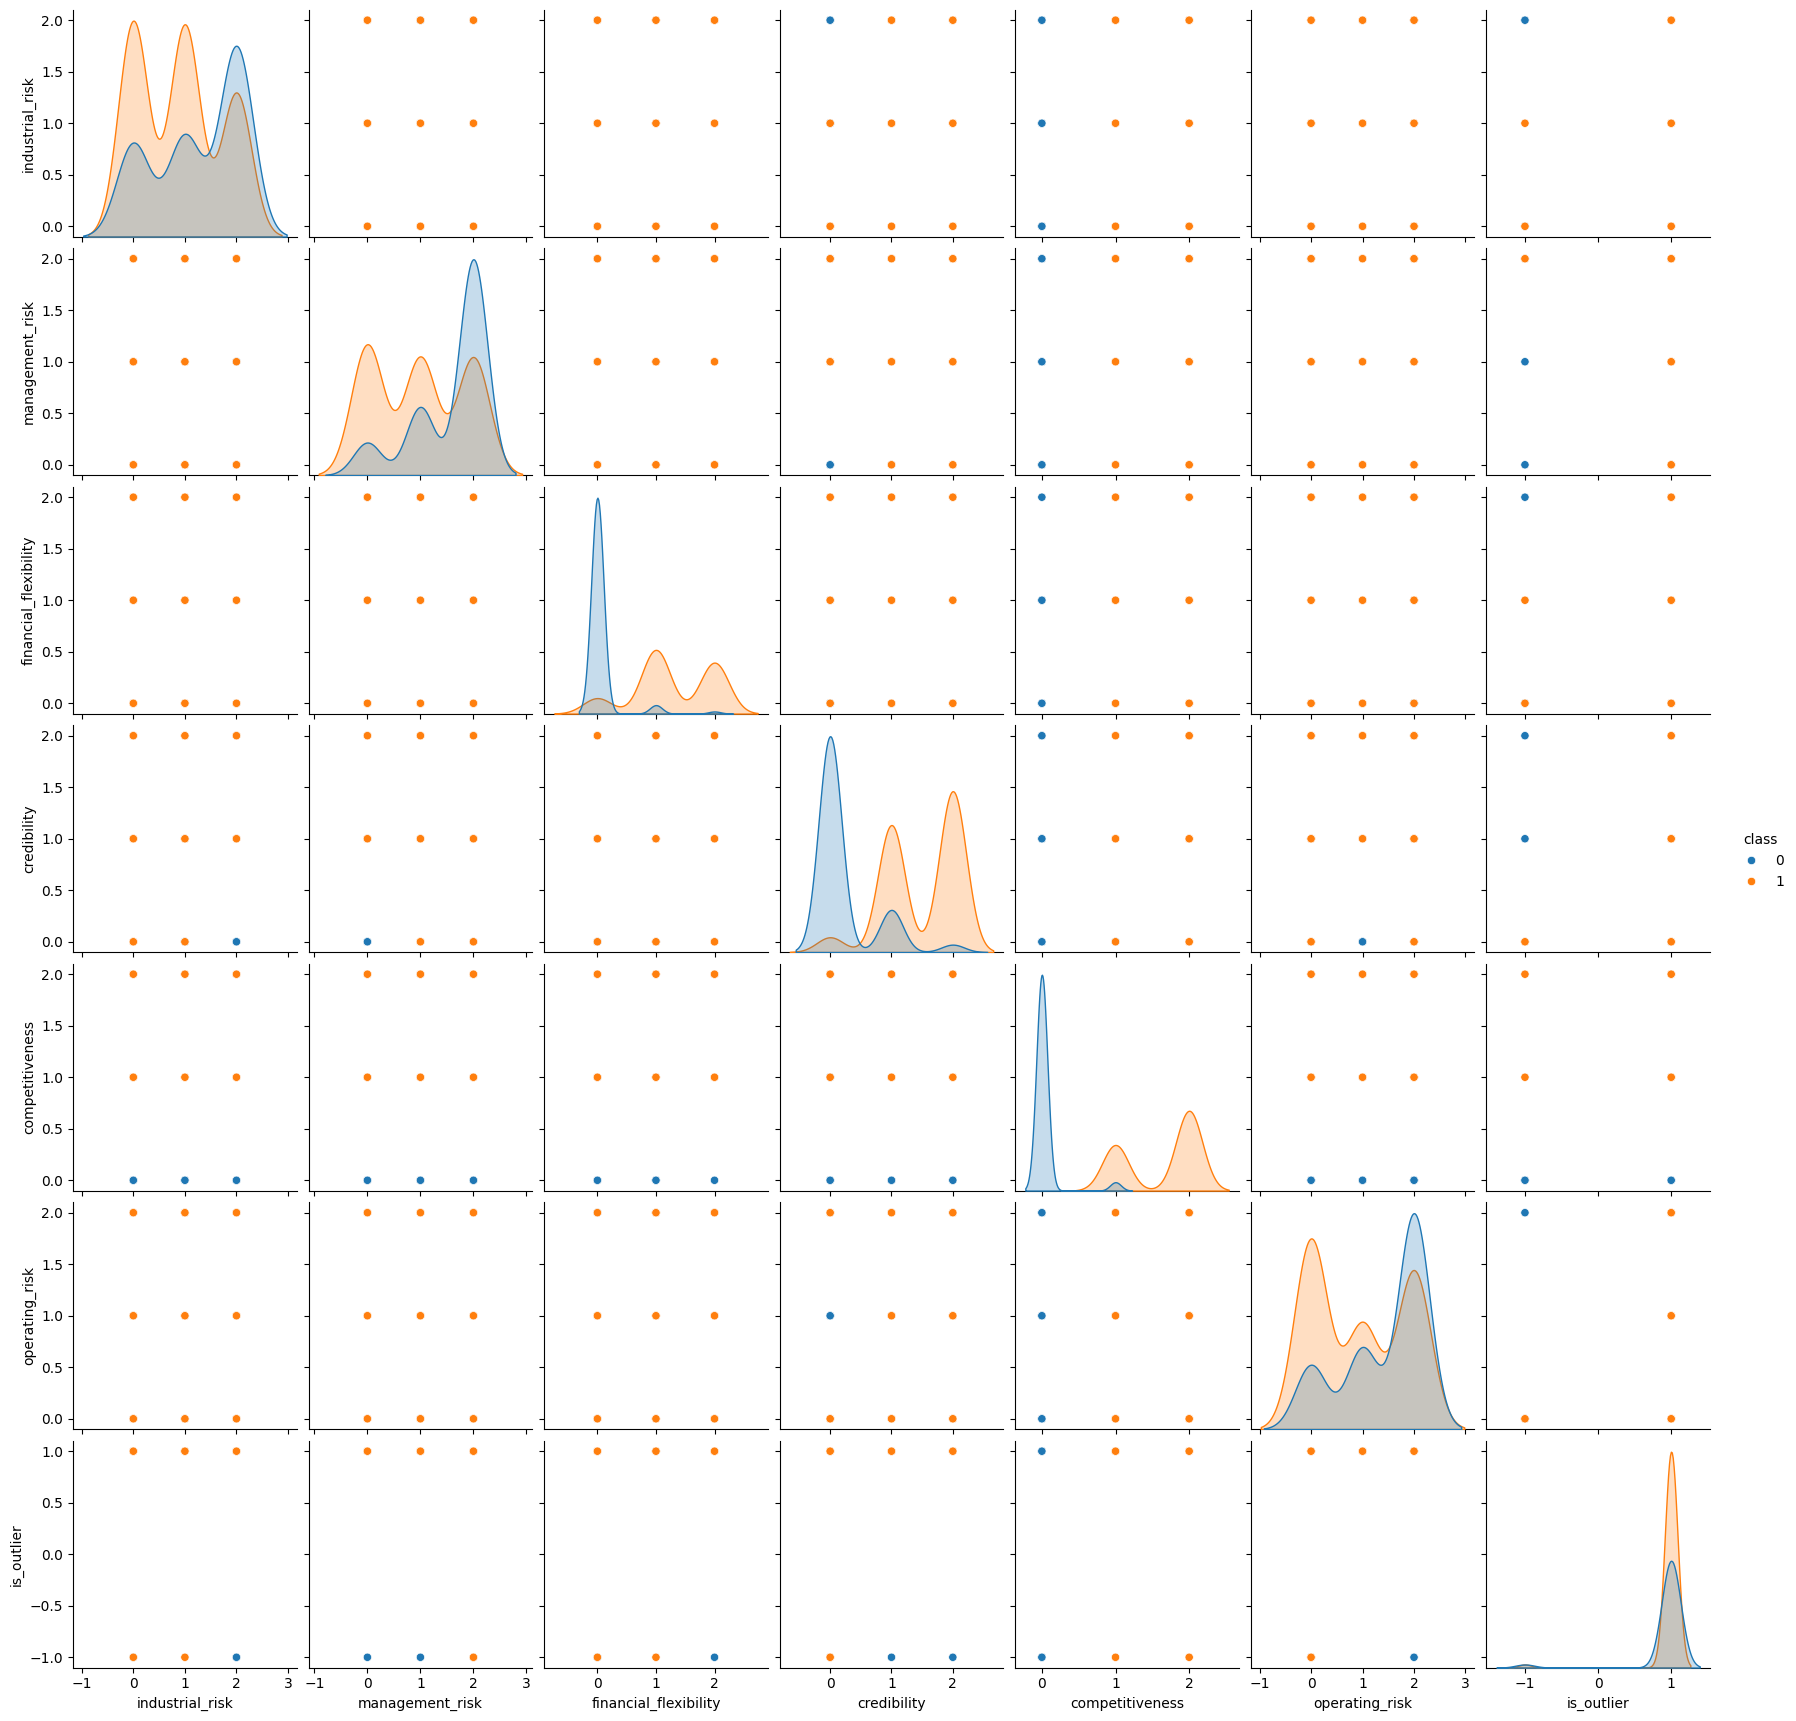

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a pairplot
sns.pairplot(data, hue='class')
plt.show()


In [ ]:
#Cross-Tabulation and Frequency Tables to understand relationships between different categorical features and the target variable
for column in categorical_columns:
    cross_tab = pd.crosstab(data[column], data['class'])
    print(f"Cross-Tabulation for {column}:\n{cross_tab}\n")

Cross-Tabulation for industrial_risk:
class             0   1
industrial_risk        
0                26  54
1                28  53
2                53  36

Cross-Tabulation for management_risk:
class             0   1
management_risk        
0                11  51
1                23  46
2                73  46

Cross-Tabulation for financial_flexibility:
class                    0   1
financial_flexibility         
0                      102  17
1                        4  70
2                        1  56

Cross-Tabulation for credibility:
class         0   1
credibility        
0            87   7
1            17  60
2             3  76

Cross-Tabulation for competitiveness:
class              0   1
competitiveness         
0                103   0
1                  4  52
2                  0  91

Cross-Tabulation for operating_risk:
class            0   1
operating_risk        
0               19  60
1               24  33
2               64  50



In [ ]:
#Chi-Square Test to assess the independence between each categorical feature and the target variable, less than the significance level (idealy 0.05, then we reject the hull hypothesis which assumes
#that there is no dependency between variables) means there is dependency
from scipy.stats import chi2_contingency
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['class'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for independence in {column}: p-value = {p}")

Chi-square test for independence in industrial_risk: p-value = 0.00035105555200737033
Chi-square test for independence in management_risk: p-value = 2.3366640799655196e-08
Chi-square test for independence in financial_flexibility: p-value = 7.334022479873933e-38
Chi-square test for independence in credibility: p-value = 5.877823993543991e-35
Chi-square test for independence in competitiveness: p-value = 1.0178695989095595e-51
Chi-square test for independence in operating_risk: p-value = 5.429569801610108e-05


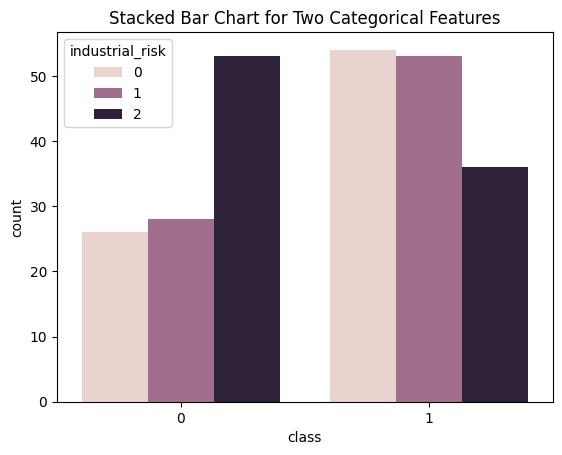

In [ ]:

sns.countplot(x='class', hue='industrial_risk', data=data)
plt.title('Stacked Bar Chart for Two Categorical Features')
plt.show()



In [ ]:
#detecting outliers
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
df=data

In [ ]:
numeric_columns = df.select_dtypes(include=['int']).columns
numeric_data = df[numeric_columns]
# Initializing the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.02)  # Adjust contamination
isolation_forest.fit(numeric_data)
outlier_predictions = isolation_forest.predict(numeric_data)
df['is_outlier'] = outlier_predictions





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df['is_outlier'].value_counts()

 1    245
-1      5
Name: is_outlier, dtype: int64

In [ ]:
cleaned_data = data[data['is_outlier'] == 1].drop('is_outlier', axis=1)


In [ ]:
#outlier detection using infrequent combinations

# Count occurrences of each feature combination
combination_counts = df.groupby(list(df.columns[:-1])).size().reset_index(name='count')

# Set a threshold for infrequency (you may adjust this based on your data)
infrequency_threshold = 2

# Identify outliers based on infrequent combinations
outliers = df.merge(combination_counts[combination_counts['count'] < infrequency_threshold],
                    on=list(df.columns[:-1]), how='right', indicator=True)

# Display the outliers
len(outliers)

29

In [ ]:
cleaned_data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,1,2,0,0,0,1,0
1,0,2,0,0,0,2,0
2,2,0,0,0,0,2,0
3,1,0,0,1,0,2,0
4,2,2,0,0,0,2,0


In [ ]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=7188ad3793f314a9be91ce6b2d2f17197c37955b8e5e6a60a8d395bd2d1f4dfd
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
#predictive power score

import ppscore as pps
df=cleaned_data
pps_matrix = pps.matrix(df)
print(pps_matrix)

                        x                      y   ppscore            case  \
0         industrial_risk        industrial_risk  1.000000  predict_itself   
1         industrial_risk        management_risk  0.101972      regression   
2         industrial_risk  financial_flexibility  0.000000      regression   
3         industrial_risk            credibility  0.000000      regression   
4         industrial_risk        competitiveness  0.004443      regression   
5         industrial_risk         operating_risk  0.000000      regression   
6         industrial_risk                  class  0.000000      regression   
7         management_risk        industrial_risk  0.000000      regression   
8         management_risk        management_risk  1.000000  predict_itself   
9         management_risk  financial_flexibility  0.038841      regression   
10        management_risk            credibility  0.000000      regression   
11        management_risk        competitiveness  0.021726      

In [ ]:
'''import seaborn as sns
predictors_df = pps.predictors(df,y='class')
sns.barplot(data=predictors_df)'''

"import seaborn as sns\npredictors_df = pps.predictors(df,y='class')\nsns.barplot(data=predictors_df)"

In [ ]:
#feature selection
z=df.drop('class', axis=1)
columns_to_drop = ['industrial_risk', 'management_risk', 'operating_risk', 'class']
X = df.drop(columns=columns_to_drop, axis=1)
y=df['class']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Feature selection using chi-square
chi2_selector = SelectKBest(chi2, k='all')
X_chi2_selected = chi2_selector.fit_transform(z, y)


In [ ]:
'''# Feature selection using mutual information
mi_selector = SelectKBest(mutual_info_classif, k='all')
X_mi_selected = mi_selector.fit_transform(X, y)'''


"# Feature selection using mutual information\nmi_selector = SelectKBest(mutual_info_classif, k='all')\nX_mi_selected = mi_selector.fit_transform(X, y)"

In [ ]:
#selected features and their scores for chi-square
chi2_selected_features = z.columns[chi2_selector.get_support()]
chi2_scores = chi2_selector.scores_
chi2_selected_features_scores = pd.DataFrame({'Feature': chi2_selected_features, 'Chi2_Score': chi2_scores})
print("Chi-Square Selected Features and Scores:")
print(chi2_selected_features_scores)


Chi-Square Selected Features and Scores:
                 Feature  Chi2_Score
0        industrial_risk    7.927808
1        management_risk   20.385729
2  financial_flexibility  122.907212
3            credibility  108.674535
4        competitiveness  159.711321
5         operating_risk   12.904641


In [ ]:
'''#selected features and their scores for mutual information gain
mi_selected_features = X.columns[mi_selector.get_support()]
mi_scores = mi_selector.scores_
mi_selected_features_scores = pd.DataFrame({'Feature': mi_selected_features, 'MI_Score': mi_scores})
print("\nMutual Information Selected Features and Scores:")
print(mi_selected_features_scores)'''

'#selected features and their scores for mutual information gain\nmi_selected_features = X.columns[mi_selector.get_support()]\nmi_scores = mi_selector.scores_\nmi_selected_features_scores = pd.DataFrame({\'Feature\': mi_selected_features, \'MI_Score\': mi_scores})\nprint("\nMutual Information Selected Features and Scores:")\nprint(mi_selected_features_scores)'

# **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression(random_state=42)
lg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred=lg.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,roc_auc_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  0],
       [ 0, 28]])

In [ ]:
'''y_prob = lg.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)'''


'y_prob = lg.predict_proba(X_test)[:, 1]\n# Calculate ROC curve\nfpr, tpr, thresholds = roc_curve(y_test, y_prob)'

In [ ]:
# Calculate AUC
#roc_auc = auc(fpr, tpr)

In [ ]:
'''# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()'''

"# Plot ROC curve\nplt.figure(figsize=(8, 6))\nplt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))\nplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curve')\nplt.legend(loc='lower right')\nplt.show()"

In [ ]:
# Output AUC
#print('AUC:', roc_auc)

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
accuracy

1.0

#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42) #Pruning to avoid overfitting
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
dt_y_predict = dt.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, dt_y_predict)
print(f'Accuracy: {accuracy}')

print('\nClassification Report:')
print(classification_report(y_test, dt_y_predict))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, dt_y_predict))


Accuracy: 0.9591836734693877

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.93      0.96        28

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49


Confusion Matrix:
[[21  0]
 [ 2 26]]


In [94]:
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(Y_train,Y_pred_train)
ac_test = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))


Training Accuracy: 1.0
Test Accuracy: 1.0


K-Nearest Neighbors (KNN)

In [ ]:
# KNN Classification

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
num_folds = 10
kfold = KFold(n_splits=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)  # Assumed k= 5
results = cross_val_score(model, X_test, y_test, cv=kfold)

In [ ]:
print(results.mean())

1.0


In [ ]:
# Grid Search for Algorithm HyperTuning (to know K value)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors = np.array(range(1,30))
param_grid = dict(n_neighbors= n_neighbors)  # passing n_neighbors in dictionary form

In [ ]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
model = KNeighborsClassifier()
grid= GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 1}


In [ ]:
# Visualizing the CV results

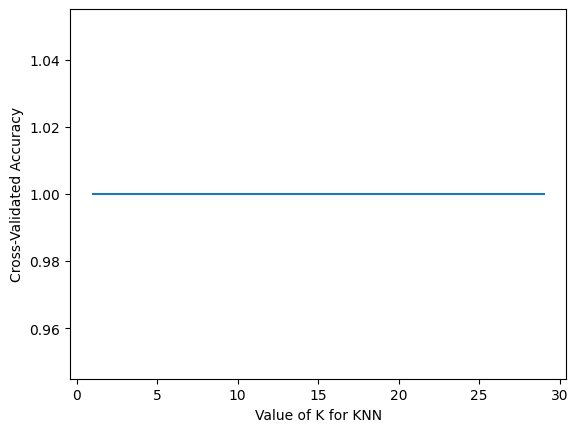

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

# Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_reduced = pca.fit_transform(X_scaled)

# choose k between 1 to 30
k_range = range(1, 30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_reduced, y_test, cv=10)
    k_scores.append(scores.mean())

# plot chart
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [ ]:
#k=4 with high accuracy of 1.0

Support Vector Machine (SVM)

In [ ]:
'''
C - cost of misclassification.
gamma - parameter that determines the influence of individual training samples on the decision boundary.
gamma-scale -> it scales the input features before kernel fuction starts.
gamma - auto -> it automatically calculates gamma based on no. of features.
degree - polynomial degree

'''

'\nC - cost of misclassification.\ngamma - parameter that determines the influence of individual training samples on the decision boundary.\ngamma-scale -> it scales the input features before kernel fuction starts.\ngamma - auto -> it automatically calculates gamma based on no. of features.\ndegree - polynomial degree\n\n'

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate data classification with 6 features
X, y = make_classification(n_samples=100, n_features=6, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernel types and corresponding parameter grids
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
param_grids = [{'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
               {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
               {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'degree': [2, 3]},
               {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}]

# Train SVM models with each kernel and perform grid search
for kernel, param_grid in zip(kernels, param_grids):
    svm = SVC(kernel=kernel)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Kernel:", kernel, "- Best Params:", best_params)

    # Evaluate accuracy with best params
    svm_best = SVC(kernel=kernel, **best_params)
    svm_best.fit(X_train, y_train)
    y_pred = svm_best.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)


Kernel: linear - Best Params: {'C': 0.1, 'gamma': 0.1}
Accuracy: 0.95
Kernel: rbf - Best Params: {'C': 10, 'gamma': 0.1}
Accuracy: 0.95
Kernel: poly - Best Params: {'C': 1, 'degree': 3, 'gamma': 0.1}
Accuracy: 0.85
Kernel: sigmoid - Best Params: {'C': 1, 'gamma': 0.1}
Accuracy: 1.0


In [ ]:
# Regularizing by reducing 'C' value to get rid of overfit accuracy for sigmoid kernel

clf_s=SVC(kernel='sigmoid', C=0.1, gamma=0.1)
clf_s.fit(X_train, y_train)
y_pred_s = clf_s.predict(X_test)
acc = accuracy_score(y_pred_s, y_test)
print("Accuracy=" , acc)

Accuracy= 0.95


NAVIE BAYES MODEL( NB)



In [ ]:
# step4: split as X and Y variable
Y = df["class"]
X = df.iloc[:,1:]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)


In [ ]:
# model fitting
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)


MultinomialNB()

In [ ]:
Y_pred_train = MNB.predict(X_train)
Y_pred_test  = MNB.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(Y_train,Y_pred_train)
ac_test = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))


Training Accuracy: 1.0
Test Accuracy: 1.0


In [ ]:
#=Cross validation =================

training_accuracy = []
test_accuracy = []


In [ ]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    MNB.fit(X_train,Y_train)
    Y_pred_train = MNB.predict(X_train)
    Y_pred_test  = MNB.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))


In [ ]:
k1 = pd.DataFrame(training_accuracy)
print("Cross validation training results:",k1.mean().round(2))
k2 = pd.DataFrame(test_accuracy)
print("Cross validation test results:",k2.mean().round(2))


Cross validation training results: 0    1.0
dtype: float64
Cross validation test results: 0    1.0
dtype: float64
